In [1]:
import tensorflow
import keras

print(keras.__version__)
print(tensorflow.__version__)

2.8.0
2.8.0


In [2]:
## Importing the libraries
import os
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.models import Sequential

# Set random seeds

os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(hash("setting random seeds") % 2 ** 32 - 1)
np.random.seed(hash("improves reproducibility") % 2 ** 32 - 1)
tf.random.set_seed(hash("by removing stochasticity") % 2 ** 32 - 1)



In [3]:
!pip install wandb -qqq
import wandb
from wandb.keras import WandbCallback
wandb.login()

wandb: Currently logged in as: tequilatech (use `wandb login --relogin` to force relogin)


True

In [4]:
## Data Preprocessing

# Preprocessing the training set

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

training_set = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 21612 images belonging to 249 classes.


In [5]:
#Preprocessing the test set

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 5511 images belonging to 252 classes.


In [6]:
## Building the CNN

# Initializing the CNN

cnn = tf.keras.models.Sequential()




In [7]:
# Convolution

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
# Pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
# Adding more convolutional layers

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))

cnn.add(tf.keras.layers.Dropout(0.2))



In [10]:
cnn.add(tf.keras.layers.Flatten())

cnn.add(layers.Dropout(0.2))

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(layers.Dropout(0.2))

In [12]:
cnn.add(tf.keras.layers.Dense(units=300, activation='softmax'))

In [13]:
# Initializing wandb with the project name
run = wandb.init(project="test-project",
                 config= { # and include hyperparameters and metadata
                     "learning_rate":0.1,
                     "epochs":60,
                     "batch_size":32,
                     "loss_function":"sparse_categorical_crossentropy",
                     "architecture":"CNN"
                 })
config = wandb.config
tf.keras.backend.clear_session()
optimizer = tf.keras.optimizers.Adam(config.learning_rate)

In [14]:
cnn.compile(optimizer, config.loss_function, metrics=['accuracy'])

In [15]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [16]:
# Training the CNN model

history = cnn.fit(x=training_set,
                  validation_data=test_set,
                  epochs=config.epochs,
                  batch_size=config.batch_size,
                  callbacks=[WandbCallback()]
                 )

Epoch 1/60
676/676 [==============================] - 108s 159ms/step - loss: 92.7203 - accuracy: 0.0047 - val_loss: 5.8304 - val_accuracy: 0.0044 - _timestamp: 1650623324.0000 - _runtime: 127.0000
Epoch 2/60
676/676 [==============================] - 112s 165ms/step - loss: 5.5830 - accuracy: 0.0050 - val_loss: 5.8519 - val_accuracy: 0.0044 - _timestamp: 1650623435.0000 - _runtime: 238.0000
Epoch 3/60
676/676 [==============================] - 97s 143ms/step - loss: 5.5794 - accuracy: 0.0051 - val_loss: 5.8871 - val_accuracy: 0.0034 - _timestamp: 1650623532.0000 - _runtime: 335.0000
Epoch 4/60
676/676 [==============================] - 137s 202ms/step - loss: 5.5800 - accuracy: 0.0042 - val_loss: 5.9042 - val_accuracy: 0.0040 - _timestamp: 1650623669.0000 - _runtime: 472.0000
Epoch 5/60
676/676 [==============================] - 123s 182ms/step - loss: 5.5834 - accuracy: 0.0060 - val_loss: 5.9168 - val_accuracy: 0.0045 - _timestamp: 1650623792.0000 - _runtime: 595.0000
Epoch 6/60
676/

676/676 [==============================] - 102s 151ms/step - loss: 5.5818 - accuracy: 0.0048 - val_loss: 6.2260 - val_accuracy: 0.0040 - _timestamp: 1650627622.0000 - _runtime: 4425.0000
Epoch 43/60
676/676 [==============================] - 99s 147ms/step - loss: 5.5836 - accuracy: 0.0044 - val_loss: 6.2202 - val_accuracy: 0.0044 - _timestamp: 1650627721.0000 - _runtime: 4524.0000
Epoch 44/60
676/676 [==============================] - 105s 155ms/step - loss: 5.5796 - accuracy: 0.0055 - val_loss: 6.2268 - val_accuracy: 0.0044 - _timestamp: 1650627826.0000 - _runtime: 4629.0000
Epoch 45/60
676/676 [==============================] - 98s 145ms/step - loss: 5.5838 - accuracy: 0.0052 - val_loss: 6.2367 - val_accuracy: 0.0038 - _timestamp: 1650627924.0000 - _runtime: 4727.0000
Epoch 46/60
676/676 [==============================] - 102s 151ms/step - loss: 5.5849 - accuracy: 0.0044 - val_loss: 6.2357 - val_accuracy: 0.0045 - _timestamp: 1650628026.0000 - _runtime: 4829.0000
Epoch 47/60
676/676

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', '_timestamp', '_runtime'])


In [18]:
# Log Predictions on test data

run = wandb.init(project="CRITR",
                 config={
                     "learning_rate": 0.001,
                     "epochs":5,
                     "batch_size": 32,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN", 
                 })
config = wandb.config

# Initialize the model
tf.keras.backend.clear_session()
cnn.summary()
optimizer = tf.keras.optimizers.Adam(config.learning_rate)
cnn.compile(optimizer, config.loss_function, metrics=['accuracy'])


accuracy,▃▄▁█▃▄▄▅▃▃▁▅▆▅▃▅▃▄▃▂▃▂▄▃▂▅▃▃▂▆▂▂▁▄▂▃▄▄▃▇
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▆▆▅▇▇▇▅▅▆▇▃█▇▅▇▅▂▅▆▇█▆▅▆▅▁█▇▆▆▇▃█▇▆▅▅▇▇▆
val_loss,▁▁▂▂▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████
accuracy,0.00569
best_epoch,0
best_val_loss,5.83043
epoch,59
loss,5.58274
val_accuracy,0.00435


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

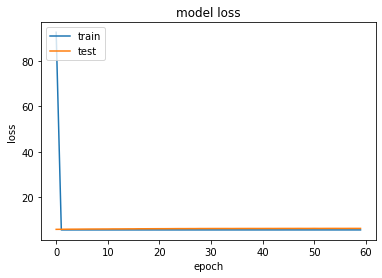

In [21]:
# Plotting the graph of the Training loss vs Validation over the number of epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

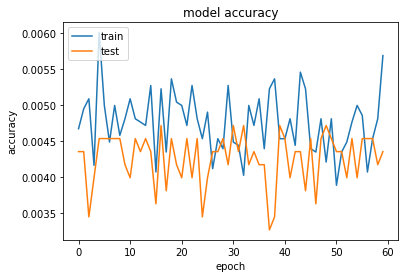

In [22]:
# Plotting the graph of training accuracy vs Validation accuracy over a number of epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()